# **네이버 영화 리뷰 데이터 활용 실습**

## 패션왕 영화 리뷰 스크래핑

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import csv
from datetime import datetime
import pandas as pd

review_data = [] # 리스트 생성

for page in range(1,100):
  print(page)
  test_url = f"https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=109937&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={page}"
  resp = requests.get(test_url) # get으로 사이트 호출
  html = BeautifulSoup(resp.content, 'html.parser') # HTML 형태로 문서화
  score_result = html.find('div', {'class': 'score_result'}) # score_result 섹션만 추출하기
  lis = score_result.findAll('li') # li 태그로 묶여있는 부분 모두 추출

  for li in lis:
    review_text = li.find('p').getText() # 리뷰 텍스트 추출
    review_text_new = review_text.replace("\n관람객", "").replace("\r", "").replace("\n", "").replace("\t", "") # 필요없는 문자열 제거
    rating_text = li.find('div', {'class':'star_score'}).find('em').getText() # 평점 추출
    upvote = li.find('a', {'class':'_sympathyButton'}).find('strong').getText() # 공감 수 추출
    downvote = li.find('a', {'class':'_notSympathyButton'}).find('strong').getText() # 비공감 수 추출
    date_text = li.find('div', {'class':'score_reple'}).find('dl').findAll('em')[1].getText() # 날짜 추출
    date_text_new = date_text[0:10] # 날짜에서 년월일만 추출
    date = datetime.strptime(date_text_new, "%Y.%m.%d") # 날짜 형식으로 전환
    name_text = li.find('div', {'class':'score_reple'}).find('dl').findAll('em')[0].getText() # 닉네임 추출
    name_text_new = name_text.replace("\n", "") # 닉네임에서 공백 지우기

    review_data.append([name_text_new, date, review_text_new, int(rating_text), int(upvote), int(downvote)]) # 데이터 리스트 형태로 쌓기



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [3]:
df = pd.DataFrame(review_data) # 데이터프레임 형태로 바꾸기
df.columns = ['name', 'date', 'review', 'rating', 'upvote', 'downvote'] # 데이터 컬럼명 변경
df

,name,date,review,rating,upvote,downvote
0,개구리코(nuru****),2014-11-06,이 영화의 가장큰...실수는 11/6 개봉 한것이다...,1,3162,567
1,반우치(dc71****),2014-11-06,이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다..,7,2199,354
2,joyw****,2014-11-09,알바들땜에 좋아하는그룹이 40대여성이야ㅋㅋㅋㅋ,1,1751,150
3,dear(lhy8****),2014-11-20,핵노잼ㅡㅡ 하도화가나서 평점처음올려봄,1,1101,262
4,winn****,2014-11-07,주원은 참 신기한 배우 맡은 역마다 다 다른사람이 연기하는 것 같음,10,1347,586
...,...,...,...,...,...,...
985,척여사(gifa****),2015-01-09,쓰레기같은영화 어이바께없다,1,2,0
986,올드(tank****),2015-01-09,나한테 칭찬해주고 싶다... 끝까지 봤다. 대단해...나님,1,2,0
987,SY(ksy0****),2015-01-08,대박 막장!!!!꽃보다 남자인줄,1,2,0
988,비노좋아(sksm****),2015-01-08,장난함? 장난하냐고?,1,2,0


In [4]:
df_group = df.groupby(['date'])['rating'] # 날짜별로 데이터를 그룹화

df_agg = pd.DataFrame({'count':df_group.count(), 'mean':df_group.mean()}) # 그룹화된 데이터에서 평점의 개수와 평균 구하기
df_agg_2014 = df_agg.loc['2014-01-01':'2014-12-31'] # 2014년 데이터만 추출
df_agg_2014

,count,mean
date,,
2014-11-06,159,9.358491
2014-11-07,118,8.881356
2014-11-08,122,9.295082
2014-11-09,75,5.146667
2014-11-10,25,8.320000
2014-11-11,42,6.761905
2014-11-12,33,2.818182
2014-11-13,11,1.363636
2014-11-14,2,1.000000


## 데이터 시각화(그래프 및 워드클라우드)


Text(0, 0.5, 'Average Ratings')

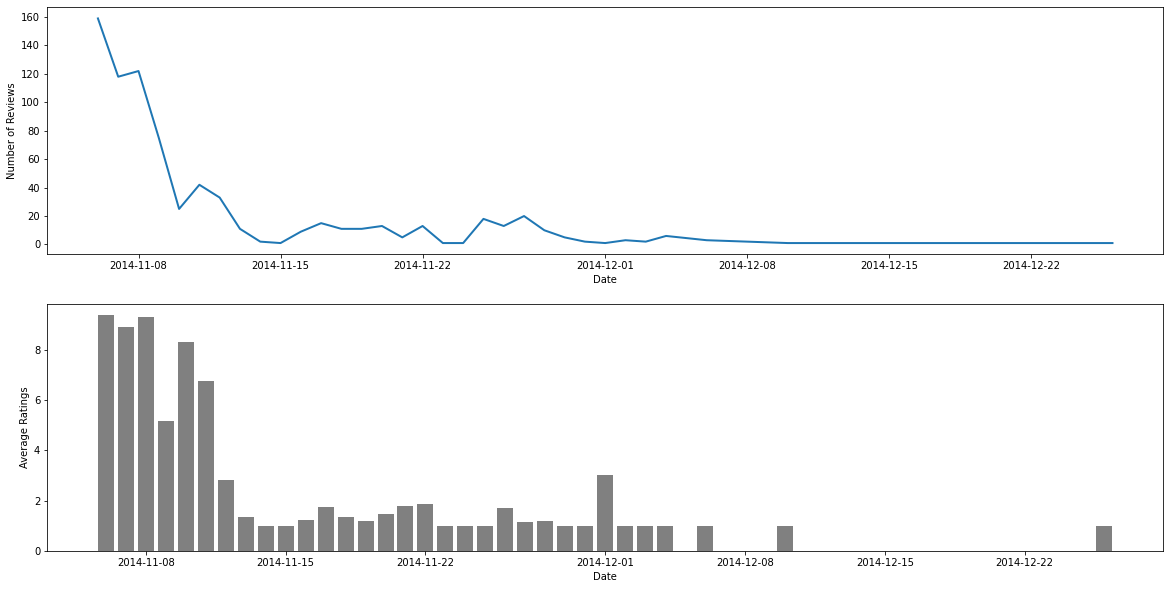

In [5]:
from matplotlib import pyplot as plt

# 데이터프레임의 각 컬럼을 리스트 형태로 전환
df_date = df_agg_2014.index.to_list()
df_count = df_agg_2014['count'].to_list()
df_rating = df_agg_2014['mean'].to_list()

plt.figure(figsize = (20,10)) # Figure 사이즈 설정

plt.subplot(2,1,1) # Figure 차원 설정
plt.plot(df_date, df_count, ms=5, lw=2, label = 'count') # 리뷰 개수 Line Plot 그리기
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

plt.subplot(2,1,2) # Figure 차원 설정
plt.bar(df_date, df_rating, color = 'grey', label = 'rating') # 평균 평점 Bar Plot 그리기
plt.xlabel('Date')
plt.ylabel('Average Ratings')

In [6]:
review_list = [review for review in df['review'] if type(review) is str] # 리뷰텍스트 추출
review_list

['이 영화의 가장큰...실수는 11/6 개봉 한것이다... ',
 '이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다.. ',
 '알바들땜에 좋아하는그룹이 40대여성이야ㅋㅋㅋㅋ ',
 '핵노잼ㅡㅡ 하도화가나서 평점처음올려봄 ',
 '주원은 참 신기한 배우 맡은 역마다 다 다른사람이 연기하는 것 같음 ',
 '우기명을 연기한 주원에게서 굿닥터 주원이 보인것이 아쉽다 ',
 '원작만 못한 영화가 많은데 이건 원작만큼 재밌네요! ',
 '평점알바가 잇다는 증거는 40대이상 평점이 8.3이 라는 것과 20대 평점이 3.98이라는 것을 보시면 증명이 됩니다. 확인해 보시죠. ',
 '맘비우고보면재미나요 ',
 '싼옷도 자신감있고 어울리면 간지 ~ ',
 '너무너무어뮤재미없어요 ',
 '해도 너무한 영화. 영화 역사를 20년쯤은 쇠퇴한 영화. 웃음 코드 엇나가기, 억지 라이벌 형성, 뜬금포 눈물바람. 어디에도 점수를 줄 수 있는 부분이 없다!! 감독님 죄송하지만, 영화는 그대의 길이 아닌 것 같네요...',
 '솔직히 난 재밌었음. 웹툰과 완전히 다른 내용이라 볼만한듯 ',
 '웹툰내용하곤 좀다른데 소소잼 ㅋ ',
 '그냥영혼없이보면재밌는거같다 ',
 '재미있네요 주원씨 멋있고 안재현씨도 멋있고 배우들도 좋고 ㅋㅋ 특이하고 재미난 영화 ',
 '애초부터 웹툰 자체가 잘못됬다 첫회부터 중고딩이란 놈이 공부는 안하고 패딩이나 사입고 그게 짝퉁이란거 알게 되자 절망하는 꼴이라니 우리나라 중고등학교의 잘못된 사회문화를 보여주는것같다 ',
 '생각한거보단 재밌긴했어요!약간 오글거리는거 빼구ㅋㅋ ',
 '만화랑 비슷해서 재밌었어요창주 진짜 똑같움 ',
 '재밌었어요 병맛요소가 더 강했으면 좋았을듯 ',
 'ㅋㅋㅋㅋ그냥 웹툰이랑 약간다른거말고는 뭐....ㅋㅋ그래도 괜찮네 기명아 흥해라♡♡♡♡ ',
 '보지도 않고 새벽 1,2시에 그러지마요오오오 ',
 '오진짜 웹툰보다 못할거라생각햇는데 진짜재밋다 ',
 '패션왕 완전 재미 있었어요~!!!패션왕 흥해랏 ',
 '기대 이상  생각보다 

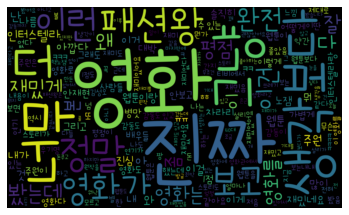

In [9]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./our_font.ttf', width=2000, height=1200).generate(''.join(review_list)) # 워드클라우드 그리기/한글 사용시 폰트 지정해줘야 함
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 리뷰 한글 텍스트마이닝

In [10]:
import re

def apply_regular_expression(text): # 정규표현식 함수 정의
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

print(df['review'][0])
print(apply_regular_expression(df['review'][0]))

이 영화의 가장큰...실수는 11/6 개봉 한것이다... 
이 영화의 가장큰실수는  개봉 한것이다 


In [11]:
df['review_re'] = df['review'].apply(lambda x: apply_regular_expression(x)) # 불용어 적용된 리뷰로 새로운 컬럼 만들기
df.head()

,name,date,review,rating,upvote,downvote,review_re
0,개구리코(nuru****),2014-11-06,이 영화의 가장큰...실수는 11/6 개봉 한것이다...,1,3162,567,이 영화의 가장큰실수는 개봉 한것이다
1,반우치(dc71****),2014-11-06,이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다..,7,2199,354,이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다
2,joyw****,2014-11-09,알바들땜에 좋아하는그룹이 40대여성이야ㅋㅋㅋㅋ,1,1751,150,알바들땜에 좋아하는그룹이 대여성이야ㅋㅋㅋㅋ
3,dear(lhy8****),2014-11-20,핵노잼ㅡㅡ 하도화가나서 평점처음올려봄,1,1101,262,핵노잼ㅡㅡ 하도화가나서 평점처음올려봄
4,winn****,2014-11-07,주원은 참 신기한 배우 맡은 역마다 다 다른사람이 연기하는 것 같음,10,1347,586,주원은 참 신기한 배우 맡은 역마다 다 다른사람이 연기하는 것 같음


In [12]:
# !pip install konlpy
%pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 19.0 MB/s 


In [13]:
from soynlp.noun import LRNounExtractor, LRNounExtractor_v2
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer
from soynlp.utils import DoublespaceLineCorpus

noun_extractor = LRNounExtractor_v2(verbose=True) # 명사추출기 불러오기
nouns = noun_extractor.train_extract(df['review_re'].to_list()) # 현재 데이터로 비지도학습

# 단어 추출기 파라미터 설정
word_extractor = WordExtractor(
    min_frequency=50, # example
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

word_extractor.train(df['review_re'].to_list()) # 현재 데이터로 비지도학습
words = word_extractor.extract()

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}

noun_scores = {noun:score.score for noun, score in nouns.items()}
combined_scores = {noun:score + cohesion_score.get(noun, 0)
    for noun, score in noun_scores.items()}
combined_scores.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
    if not (subword in combined_scores)}
)

tokenizer = LTokenizer(scores=combined_scores) # 현재 데이터를 기반으로 한 토크나이저 생성

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 4952 from 990 sents. mem=0.313 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=8384, mem=0.323 Gb
[Noun Extractor] batch prediction was completed for 1700 words
[Noun Extractor] checked compounds. discovered 155 compounds
[Noun Extractor] postprocessing detaching_features : 588 -> 556
[Noun Extractor] postprocessing ignore_features : 556 -> 536
[Noun Extractor] postprocessing ignore_NJ : 536 -> 535
[Noun Extractor] 535 nouns (155 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.326 Gb                    
[Noun Extractor] 46.65 % eojeols are covered
training was done. used memory 0.329 Gb
all cohesion probabilities was computed. # words = 26
all branching entropies was computed # words = 1486
all accessor variety was computed # wor

In [14]:
# 토크나이저 테스트
train_list=df['review_re'].to_list()
print(str(train_list[0]))
print(tokenizer.tokenize(str(train_list[0])))
print(str(train_list[1]))
print(tokenizer.tokenize(str(train_list[1])))

이 영화의 가장큰실수는  개봉 한것이다 
['이', '영화', '의', '가장큰실수는', '개봉', '한것이다']
이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다 
['이', '영화', '는', '인터스텔라', '랑', '같은', '날', '개봉', '해선', '안됐다']


In [15]:
corpus = "".join(df['review_re'].tolist()) # 리뷰 전부 합치기
review_noun = tokenizer.tokenize(corpus) # 리뷰 토큰화
print(review_noun)

['이', '영화', '의', '가장큰실수는', '개봉', '한것이다', '이', '영화', '는', '인터스텔라', '랑', '같은', '날', '개봉', '해선', '안됐다', '알바들땜에', '좋아', '하는그룹이', '대여성이야ㅋㅋㅋㅋ', '핵노잼', 'ㅡㅡ', '하도화가나서', '평점', '처음올려봄', '주원', '은', '참', '신기', '한', '배우', '맡은', '역마다', '다', '다른사람', '이', '연기', '하는', '것', '같음', '우기명', '을', '연기', '한', '주원', '에게서', '굿닥터', '주원', '이', '보인것이', '아쉽다', '원작', '만', '못한', '영화', '가', '많은데', '이건', '원작', '만큼', '재밌', '네요', '평점', '알바가', '잇다는', '증거는', '대이상', '평점', '이', '이', '라는', '것과', '대', '평점', '이', '이라는', '것을', '보시면', '증명이', '됩니다', '확인해', '보시죠', '맘비우고보면재미나요', '싼옷도', '자신감', '있고', '어울리면', '간지', '너무너무', '어뮤재미없어요', '해도', '너무', '한', '영화', '영화', '역사를', '년쯤은', '쇠퇴한', '영화', '웃음', '코드', '엇나가기', '억지', '라이벌', '형성', '뜬금포', '눈물바람', '어디', '에도', '점수', '를', '줄', '수', '있는', '부분', '이', '없다', '감독', '님', '죄송', '하지만', '영화', '는', '그대', '의', '길이', '아닌', '것', '같네요솔직히', '난', '재밌', '었음', '웹툰', '과', '완전히', '다른', '내용', '이라', '볼만', '한듯', '웹툰', '내용하곤', '좀다른데', '소소', '잼', 'ㅋ', '그냥영혼없이보면재밌는거같다', '재미', '있네요', '주원', '씨', '멋있고', '안재현씨', '도', '멋있고',

In [16]:
from collections import Counter

# 가장 빈도가 많은 10개의 단어 보기
counter = Counter(nouns)
counter.most_common(10)

[('영화', NounScore(frequency=277, score=0.6666666666666666)),
 ('진짜', NounScore(frequency=92, score=1.0)),
 ('생각', NounScore(frequency=81, score=1.0)),
 ('웹툰', NounScore(frequency=74, score=1.0)),
 ('재미', NounScore(frequency=71, score=0.9344262295081968)),
 ('패션왕', NounScore(frequency=54, score=0.8888888888888888)),
 ('점', NounScore(frequency=52, score=0.9130434782608695)),
 ('인터스텔라', NounScore(frequency=50, score=0.8125)),
 ('주원', NounScore(frequency=48, score=1.0)),
 ('안', NounScore(frequency=48, score=0.5))]

In [17]:
# 단어 길이가 2 이상인 단어 중, 가장 빈도가 많은 10개의 단어 보기
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('영화', NounScore(frequency=277, score=0.6666666666666666)),
 ('진짜', NounScore(frequency=92, score=1.0)),
 ('생각', NounScore(frequency=81, score=1.0)),
 ('웹툰', NounScore(frequency=74, score=1.0)),
 ('재미', NounScore(frequency=71, score=0.9344262295081968)),
 ('패션왕', NounScore(frequency=54, score=0.8888888888888888)),
 ('인터스텔라', NounScore(frequency=50, score=0.8125)),
 ('주원', NounScore(frequency=48, score=1.0)),
 ('너무', NounScore(frequency=46, score=1.0)),
 ('평점', NounScore(frequency=42, score=0.8947368421052632))]

In [18]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist() # 불용어 리스트 불러오기

# 불용어 추가
our_stopwords = ['패션왕', '영화']
for word in our_stopwords:
    stopwords.append(word)


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    nouns = tokenizer.tokenize(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['review'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
word_list

['ㄴㅈ인데',
 'ㄷㄷ',
 'ㄹㅇ',
 'ㅁㅊ',
 'ㅁㅊ진심너무나',
 'ㅅㄱ',
 'ㅅㄱㅇ',
 'ㅅㅂ',
 'ㅆㄹㄱ',
 'ㅇㅇ개노잼',
 'ㅇㅈ',
 'ㅇ그나저나',
 'ㅇ그냥웹툰으로만',
 'ㅉㅉ',
 'ㅉㅉ자원낭비다',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅋㅋㅋㅋ기대이상입니다',
 'ㅋㅋㅋㅋ점수',
 'ㅋㅋㅋㅋ제생에',
 'ㅋㅋ객관적으로',
 'ㅋㅋ그냥',
 'ㅋㅋ난도대체',
 'ㅋㅋ웹드라마보다',
 'ㅋㅋ이딴것도',
 'ㅋ꼬맹이들아',
 'ㅋ나도',
 'ㅋ노잼에다가',
 'ㅋ돈',
 'ㅋ알바',
 'ㅋ재밌게',
 'ㅋ잼네',
 'ㅋ지금',
 'ㅋ진짜',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅎㅎㅎㅎ',
 'ㅎㅎ재밌어요',
 'ㅎㅎ제작비가아깝다',
 'ㅎ마하하핳미친',
 'ㅜㅜ',
 'ㅜㅜ반전영화',
 'ㅠㅠ',
 'ㅠㅠ내',
 'ㅠㅠ이걸',
 'ㅡㅡ',
 '가기',
 '가꾸고',
 '가끔',
 '가는',
 '가는줄',
 '가는지',
 '가능한듯',
 '가던가',
 '가던가ㅡㅡ',
 '가되게빨랐다',
 '가득한',
 '가리지도',
 '가벼운',
 '가볍게',
 '가볍게보기좋음',
 '가서인지',
 '가슴이',
 '가시지아쉬워요',
 '가야겠다',
 '가어울린다',
 '가없었어도',
 '가없으면',
 '가장',
 '가장큰실수는',
 '가정환경에서',
 '가져다',
 '가줄',
 '가지',
 '가지가지한다진짴ㅋㅋㅋㅋ',
 '가지마라',
 '가지마셈',
 '가지첨에',
 '가진',
 '가치가',
 '가튼데',
 '가해소됨ㅠㅠ',
 '각본이',
 '각색',
 '각자평가해야할듯',
 '간간히',
 '간다',
 '간단하게',
 '간만에',
 '간만이예요',
 '간지',
 '갇네요재밌게',
 '갈갈이',
 '갈기갈기',
 '갈려서',
 '갈리길래',
 '갈린다던지',
 '갈릴',
 '갈릴거',
 '갈수록',
 '감독',
 '감동',
 '감사',
 '감성팔이',
 '감수성',
 '감이',
 '감정으로',
 '감종적음부분도',
 '감칠맛쩌네',
 '감히',
 '갑니다',
 

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect) # 각 문서내 단어들의 개별 중요도 추출

print(tf_idf_vect[1])

  (0, 3845)	0.5518969963251646
  (0, 2889)	0.29398525071703446
  (0, 2101)	0.5518969963251646
  (0, 162)	0.3371788349537649
  (0, 137)	0.43669499254581173


In [22]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()} # 단어 아이디 반환
print(str(invert_index_vectorizer)[:100]+'...') 

{69: '가장큰실수는', 162: '개봉', 3771: '한것이다', 2889: '인터스텔라', 137: '같은', 3845: '해선', 2101: '안됐다', 2195: '알바...


## 로지스틱 회귀모형을 이용한 리뷰 감성분석

In [23]:
# 평점 6점 이상이면 긍정, 5점 이하면 부정적으로 이분화

def rating_to_label(rating):
    if rating > 5:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))
df.head()

,name,date,review,rating,upvote,downvote,review_re,y
0,개구리코(nuru****),2014-11-06,이 영화의 가장큰...실수는 11/6 개봉 한것이다...,1,3162,567,이 영화의 가장큰실수는 개봉 한것이다,0
1,반우치(dc71****),2014-11-06,이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다..,7,2199,354,이 영화는 인터스텔라랑 같은 날 개봉해선 안됐다,1
2,joyw****,2014-11-09,알바들땜에 좋아하는그룹이 40대여성이야ㅋㅋㅋㅋ,1,1751,150,알바들땜에 좋아하는그룹이 대여성이야ㅋㅋㅋㅋ,0
3,dear(lhy8****),2014-11-20,핵노잼ㅡㅡ 하도화가나서 평점처음올려봄,1,1101,262,핵노잼ㅡㅡ 하도화가나서 평점처음올려봄,0
4,winn****,2014-11-07,주원은 참 신기한 배우 맡은 역마다 다 다른사람이 연기하는 것 같음,10,1347,586,주원은 참 신기한 배우 맡은 역마다 다 다른사람이 연기하는 것 같음,1


In [24]:
df['y'].value_counts()

0    504
1    486
Name: y, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

# 트레인 세트 및 테스트 세트 분리
x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logitstic 회귀분석 이용하여 긍정/부정 예측
# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [27]:
# 평가지표 산출
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.86
precision: 0.93
recall: 0.77
F1: 0.84


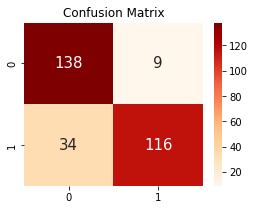

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix 그리기 (x축이 실제 데이터, y축이 예측한 데이터)
confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [29]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
# 긍정적인 리뷰에 기여한 단어들
coef_pos_index

[(2.638113908432215, 3080),
 (1.7675959541318893, 101),
 (1.505148712910116, 1609),
 (1.3387533408366268, 404),
 (1.263408067584607, 2931),
 (1.250996614932346, 1523),
 (1.2200705875896483, 1791),
 (1.1466100603695157, 3308),
 (1.1140538181308441, 3064),
 (1.0673293164795428, 2939),
 (1.0596679238473756, 90),
 (1.0429154583108504, 2529),
 (1.027686466611505, 2674),
 (1.0194629598420262, 59),
 (0.9926319467183948, 811),
 (0.8724091421767354, 638),
 (0.8153063025244605, 1089),
 (0.8072801689255543, 3083),
 (0.7733950371333221, 1493),
 (0.7471306696721721, 2922),
 (0.7299885227344889, 428),
 (0.7148401062737585, 2164),
 (0.7062857922180752, 2141),
 (0.7056412073262348, 2405),
 (0.696858153902691, 506),
 (0.6755048172388232, 2120),
 (0.634131893212144, 1455),
 (0.6305686871564475, 783),
 (0.626170592067184, 1498),
 (0.6211271148953954, 1244),
 (0.5990814516925915, 1486),
 (0.5807180277356306, 1809),
 (0.5752866137352076, 357),
 (0.5696639691074783, 3547),
 (0.5515316354306303, 3410),
 (0.5

In [30]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{69: '가장큰실수는',
 162: '개봉',
 3771: '한것이다',
 2889: '인터스텔라',
 137: '같은',
 3845: '해선',
 2101: '안됐다',
 2195: '알바들땜에',
 3266: '좋아',
 3689: '하는그룹이',
 818: '대여성이야ㅋㅋㅋㅋ',
 3861: '핵노잼',
 45: 'ㅡㅡ',
 3717: '하도화가나서',
 3623: '평점',
 3458: '처음올려봄',
 3308: '주원',
 1922: '신기',
 1454: '배우',
 1242: '맡은',
 2398: '역마다',
 748: '다른사람',
 2405: '연기',
 3681: '하는',
 145: '같음',
 2586: '우기명',
 2360: '에게서',
 328: '굿닥터',
 1570: '보인것이',
 2073: '아쉽다',
 2665: '원작',
 1342: '못한',
 1168: '많은데',
 2722: '이건',
 1147: '만큼',
 3080: '재밌',
 638: '네요',
 2189: '알바가',
 2921: '잇다는',
 3365: '증거는',
 819: '대이상',
 1034: '라는',
 209: '것과',
 2773: '이라는',
 214: '것을',
 1553: '보시면',
 3366: '증명이',
 932: '됩니다',
 3947: '확인해',
 1554: '보시죠',
 1196: '맘비우고보면재미나요',
 1980: '싼옷도',
 2996: '자신감',
 2931: '있고',
 2260: '어울리면',
 90: '간지',
 626: '너무너무',
 2249: '어뮤재미없어요',
 3834: '해도',
 623: '너무',
 2399: '역사를',
 653: '년쯤은',
 1856: '쇠퇴한',
 2652: '웃음',
 3528: '코드',
 2344: '엇나가기',
 2279: '억지',
 1040: '라이벌',
 3920: '형성',
 1030: '뜬금포',
 686: '눈물바람',
 2238: '어디',
 2363:

In [31]:
# 긍정적인 리뷰에 기여한 단어들
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

재밌 2.638113908432215
감동 1.7675959541318893
볼만 1.505148712910116
기대 1.3387533408366268
있고 1.263408067584607
보다 1.250996614932346
생각 1.2200705875896483
주원 1.1466100603695157
재미 1.1140538181308441
있는 1.0673293164795428
간지 1.0596679238473756
완전 1.0429154583108504
웹툰 1.027686466611505
가볍게 1.0194629598420262
대박 0.9926319467183948
네요 0.8724091421767354
마지막 0.8153063025244605
재밌어요 0.8072801689255543
보고 0.7733950371333221
있게 0.7471306696721721


In [32]:
# 부정적인 리뷰에 기여한 단어들
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

인터스텔라 -1.7348227211153915
최악 -1.3323038717562503
감독 -1.2980108247880133
쓰레기 -1.1479300645660182
노잼 -1.0865099224469932
진짜 -0.9451310867655636
아깝다 -0.9169791964643771
없다 -0.795260331979385
이딴 -0.7559927535925427
이영화 -0.7050796617120373
심각 -0.638904449284562
무슨 -0.6369427844196167
차라리 -0.6274355537935545
이걸 -0.6267973074528308
아까운 -0.6188049207836147
점도 -0.5914195564717106
이게 -0.5880138531154963
핵노잼 -0.5775836042102044
개봉 -0.5629955460138566
진심 -0.5388304072260408
